In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [24]:
mel_house_data=pd.read_csv("Melbourne_housing_FULL.csv")
mel_house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [25]:
mel_house_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [26]:
mel_house_data.isnull().sum()/mel_house_data.shape[0]

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.218321
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000029
Postcode         0.000029
Bedroom2         0.235735
Bathroom         0.235993
Car              0.250394
Landsize         0.338813
BuildingArea     0.605761
YearBuilt        0.553863
CouncilArea      0.000086
Lattitude        0.228821
Longtitude       0.228821
Regionname       0.000086
Propertycount    0.000086
dtype: float64

## Feature Selection using Missing value Ratio
### Observe that Setting a missing value threshold of 90% will eliminate the target price column
### Dropping BuildingArea and YearBuilt makes more logical sense

In [38]:
mel_house_data= mel_house_data.drop(['BuildingArea','YearBuilt'],axis=1)

KeyError: "['BuildingArea' 'YearBuilt'] not found in axis"

In [28]:
mel_house_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [36]:
mel_house_data['Bedroom2']= mel_house_data[['Bedroom2']].fillna(mel_house_data['Bedroom2'].median())
mel_house_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [35]:
mel_house_data['Bathroom']= mel_house_data[['Bathroom']].fillna(mel_house_data['Bathroom'].median())

In [39]:
mel_house_data.isnull().sum()/mel_house_data.shape[0]

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.218321
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000029
Postcode         0.000029
Bedroom2         0.000000
Bathroom         0.000000
Car              0.250394
Landsize         0.338813
CouncilArea      0.000086
Lattitude        0.228821
Longtitude       0.228821
Regionname       0.000086
Propertycount    0.000086
dtype: float64

In [40]:
mel_house_data= mel_house_data.drop(['Car','Landsize'],axis=1)

In [41]:
mel_house_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [42]:
mel_house_data['Lattitude']=mel_house_data['Lattitude'].fillna(method='bfill')

In [44]:
mel_house_data['Longtitude']=mel_house_data['Longtitude'].fillna(method='bfill')

In [51]:
mel_house_data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [46]:
mel_house_data['Price']=mel_house_data['Price'].fillna(mel_house_data['Price'].mean())

In [50]:
mel_house_data= mel_house_data.fillna(method='ffill')

In [55]:
num_types=['int16','int32','int64','float16','float32','float64']
num_columns=list(mel_house_data.select_dtypes(include=num_types).columns)
num_columns

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [61]:
mel_house_data_copy=mel_house_data.copy()


In [62]:
mel_house_data_copy.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [64]:
mel_house_data_copy=mel_house_data_copy[num_columns]
mel_house_data_copy.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')

In [65]:
mel_house_data_copy=mel_house_data_copy.drop(['Lattitude','Longtitude','Postcode'],axis=1)
mel_house_data_copy.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Propertycount'], dtype='object')

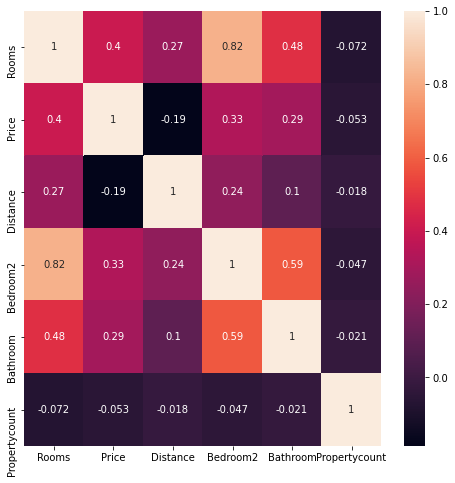

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(mel_house_data_copy.corr(),annot=True)
plt.show()